In [1]:
import numpy as np
import pandas as pd


In [2]:
df = pd.read_csv('C:/Users/cyadav/Python_Practice/ML_Project_Spam_detector/archive/spam.csv')

In [3]:
df.sample(5)

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
1404,ham,Actually getting ready to leave the house.,NaN,NaN,NaN
5002,spam,CDs 4u: Congratulations ur awarded �500 of CD ...,NaN,NaN,NaN
1042,ham,Easy ah?sen got selected means its good..,NaN,NaN,NaN
5114,ham,Argh why the fuck is nobody in town ;_;,NaN,NaN,NaN
1167,ham,Lol now I'm after that hot air balloon!,NaN,NaN,NaN


In [4]:
df.shape

(5572, 5)

In [5]:
# 1. data cleaning
# 2. EDA
# 3. Text preprocessing
# 4. Model building
# 5. Evaluation
#. 6 Improvement
#. 7 Website
#. 8 Deploy


#### 1. Data Cleaning

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   v1          5572 non-null   object
 1   v2          5572 non-null   object
 2   Unnamed: 2  50 non-null     object
 3   Unnamed: 3  12 non-null     object
 4   Unnamed: 4  6 non-null      object
dtypes: object(5)
memory usage: 217.8+ KB


In [7]:
df.drop(columns=['Unnamed: 2', 'Unnamed: 3', 'Unnamed: 4'], inplace=True)

In [8]:
df.sample(5)

,v1,v2
5189,spam,ree entry in 2 a weekly comp for a chance to w...
1301,ham,I tot u reach liao. He said t-shirt.
1650,ham,I dont have any of your file in my bag..i was ...
3249,ham,"Babe, I need your advice"
1715,ham,Asking do u knw them or nt? May be ur frnds or...


In [9]:
#renaming the columns for better understanding

df.rename(columns={'v1':'target','v2':'tesxt'}, inplace=True)

In [10]:
df.sample(5)

,target,tesxt
5360,ham,"Hey, iouri gave me your number, I'm wylie, rya..."
597,spam,You have an important customer service announc...
2912,ham,Kindly send some one to our flat before &lt;D...
560,ham,Hi msg me:)i'm in office..
1132,ham,Good morning princess! How are you?


In [11]:
# using label encoder for converting the target variable in number

from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()

df['target'] = encoder.fit_transform(df['target'])

df.head()

,target,tesxt
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


In [12]:
#checking for missing values

df.isnull().sum()

target    0
tesxt     0
dtype: int64

In [13]:
#check for duplicate values

df.duplicated().sum()

403

In [14]:
#remove duplicates

df = df.drop_duplicates(keep='first')
df.duplicated().sum()

0

In [15]:
df.shape

(5169, 2)

#### 2. EDA


In [16]:
# just to check the percentage distribution of the target variables

df['target'].value_counts()

0    4516
1     653
Name: target, dtype: int64

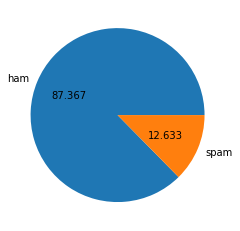

In [17]:
# visual presentation of the distribution

import matplotlib.pyplot as plt

plt.pie(df['target'].value_counts(), labels=['ham', 'spam'], autopct="%0.3f")
plt.show()

In [18]:
# data is imbalanced as we have more "ham" messages vs "spam"

In [19]:
#using the NLP libraries/techniques for creating additional columns

import nltk

nltk.download('punkt')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\cyadav\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [20]:
#count the number of character in text columns

df['num_character'] = df['tesxt'].apply(len)

In [21]:
df.head()

,target,tesxt,num_character
0,0,"Go until jurong point, crazy.. Available only ...",111
1,0,Ok lar... Joking wif u oni...,29
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,0,U dun say so early hor... U c already then say...,49
4,0,"Nah I don't think he goes to usf, he lives aro...",61


In [22]:
# count the number of words in the teaxt column

df['num_words'] = df['tesxt'].apply(lambda x:len(nltk.word_tokenize(x)))

df.head()

,target,tesxt,num_character,num_words
0,0,"Go until jurong point, crazy.. Available only ...",111,24
1,0,Ok lar... Joking wif u oni...,29,8
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37
3,0,U dun say so early hor... U c already then say...,49,13
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15


In [23]:
# count the number of sentences in the teaxt column

df['num_sent'] = df['tesxt'].apply(lambda x:len(nltk.sent_tokenize(x)))

df.head()

,target,tesxt,num_character,num_words,num_sent
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2
1,0,Ok lar... Joking wif u oni...,29,8,2
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2
3,0,U dun say so early hor... U c already then say...,49,13,1
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1


In [24]:
#checknig the distribution of the dataset(ham vs spam), we can see that max value is way more than the average value

df[['num_character', 'num_words', 'num_sent']].describe()

,num_character,num_words,num_sent
count,5169.000000,5169.000000,5169.000000
mean,78.923776,18.456375,1.962275
std,58.174846,13.323322,1.433892
min,2.000000,1.000000,1.000000
25%,36.000000,9.000000,1.000000
50%,60.000000,15.000000,1.000000
75%,117.000000,26.000000,2.000000
max,910.000000,220.000000,38.000000


In [27]:
# so lets check the distribution for both vriables seperately
#ham

df[df['target'] == 0][['num_character', 'num_words', 'num_sent']].describe()

,num_character,num_words,num_sent
count,4516.000000,4516.000000,4516.000000
mean,70.456820,17.123339,1.815545
std,56.356802,13.491315,1.364098
min,2.000000,1.000000,1.000000
25%,34.000000,8.000000,1.000000
50%,52.000000,13.000000,1.000000
75%,90.000000,22.000000,2.000000
max,910.000000,220.000000,38.000000


In [28]:
#spam
#we can see that the mean of spam messages is more than ham message usually the spam messages are lengthy 

df[df['target'] == 1][['num_character', 'num_words', 'num_sent']].describe()

,num_character,num_words,num_sent
count,653.000000,653.000000,653.000000
mean,137.479326,27.675345,2.977029
std,30.014336,7.011513,1.493676
min,13.000000,2.000000,1.000000
25%,131.000000,25.000000,2.000000
50%,148.000000,29.000000,3.000000
75%,157.000000,32.000000,4.000000
max,223.000000,46.000000,9.000000


<AxesSubplot:xlabel='num_character', ylabel='Count'>

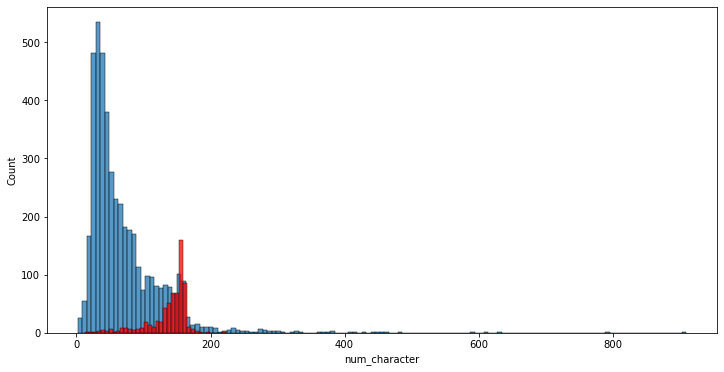

In [33]:
#plotting the above values

import seaborn as sns

plt.figure(figsize=(12,6))
sns.histplot(df[df['target'] ==0]['num_character'])
sns.histplot(df[df['target'] ==1]['num_character'], color='red')

<AxesSubplot:xlabel='num_words', ylabel='Count'>

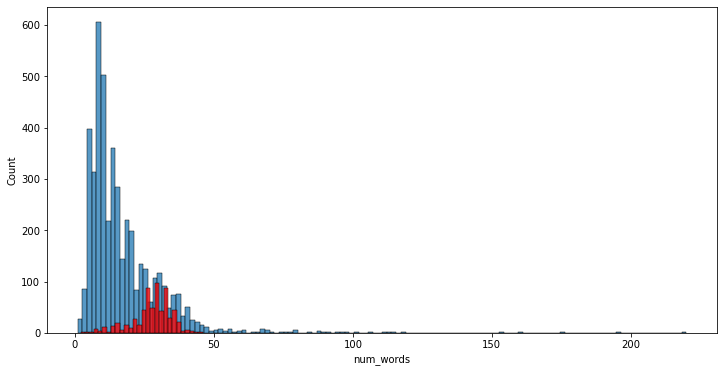

In [35]:

plt.figure(figsize=(12,6))
sns.histplot(df[df['target'] ==0]['num_words'])
sns.histplot(df[df['target'] ==1]['num_words'], color='red')

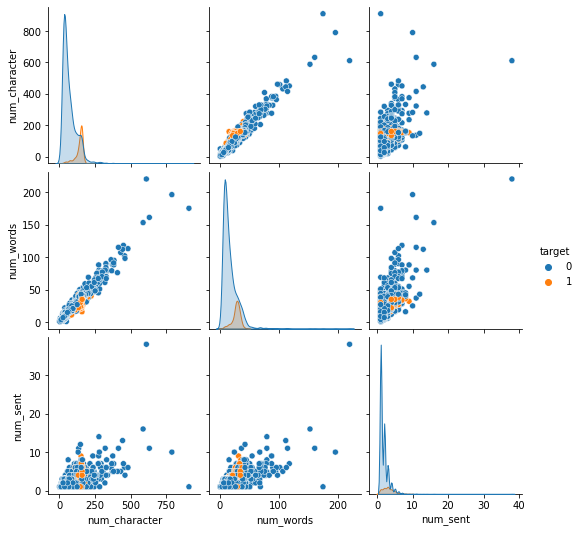

In [37]:
# to check the relation between the columns
# one of the observation form the below ploting is we can see the outliers in the data set
sns.pairplot(df, hue='target')

<AxesSubplot:>

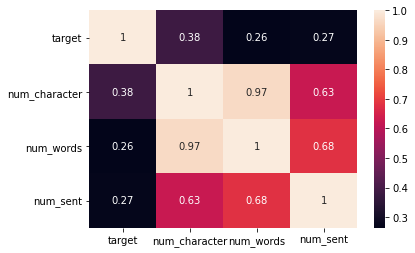

In [38]:
# lets check the corelation coefficient and see it through heat map
#observation from this map is that as can see multicolinearity so we will have to drop the columns and just keep one column so 
# we will keep the num_words column

sns.heatmap(df.corr(),annot=True)

#### 3. Data Preprocessing
- Lower case
- Tokenization
- Removing Special Character
- Removing stop words and punctuation
- Stemming

In [73]:
#creating a function to do all the data preprocessing in one go

from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
import string
ps = PorterStemmer()


def transform_text(text):
    text  = text.lower()
    text = nltk.word_tokenize(text)
    y=[]
    for i in text:
        if i.isalnum():
            y.append(i)
 #cloningcopying list to  text    
    text = y[:]
    y.clear()
    
    for i in text:
        if i not in stopwords.words('english') and i not in string.punctuation:
            y.append(i)
    
    text = y[:]
    y.clear()
    
    for i in text:
        y.append(ps.stem(i))
        
    return " ".join(y)
    
    

In [77]:
# creating a new column as transformed_text

df['transformed_text'] = df['tesxt'].apply(transform_text)

In [78]:
df.head()

,target,tesxt,num_character,num_words,num_sent,transformed_text
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2,go jurong point crazi avail bugi n great world...
1,0,Ok lar... Joking wif u oni...,29,8,2,ok lar joke wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2,free entri 2 wkli comp win fa cup final tkt 21...
3,0,U dun say so early hor... U c already then say...,49,13,1,u dun say earli hor u c alreadi say
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1,nah think goe usf live around though


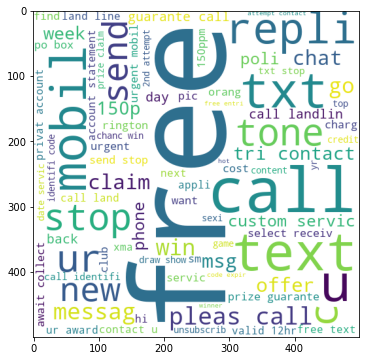

In [85]:
# generating a word cloud for spam messages

from wordcloud import WordCloud
wc = WordCloud(width=500,height=500,min_font_size=10,background_color='white')

spam_wc = wc.generate(df[df['target']==1]['transformed_text'].str.cat(sep=" "))


plt.figure(figsize=(15,6))
plt.imshow(spam_wc)

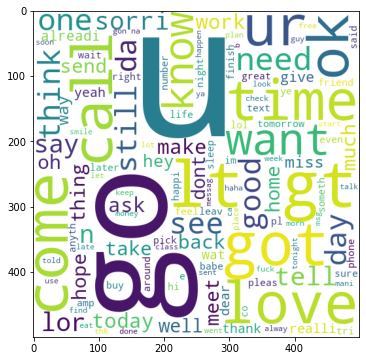

In [86]:
# generating a word cloud for ham messages

spam_wc = wc.generate(df[df['target']==0]['transformed_text'].str.cat(sep=" "))


plt.figure(figsize=(15,6))
plt.imshow(spam_wc)

In [91]:
spam_corpus = []

for msg in df[df['target']==1]['transformed_text'].tolist():
    for word in msg.split():
        spam_corpus.append(word)

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


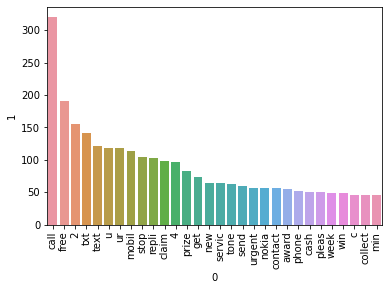

In [95]:
# count and visualizing the top 30 words in spam messages

from collections import Counter
sns.barplot(pd.DataFrame(Counter(spam_corpus).most_common(30))[0],pd.DataFrame(Counter(spam_corpus).most_common(30))[1])
plt.xticks(rotation='vertical')
plt.show()

In [96]:
ham_corpus = []

for msg in df[df['target']==0]['transformed_text'].tolist():
    for word in msg.split():
        ham_corpus.append(word)

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


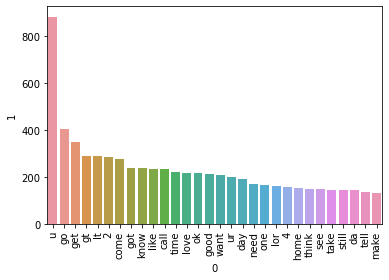

In [97]:
# count and visualizing the top 30 words in ham  messages

from collections import Counter
sns.barplot(pd.DataFrame(Counter(ham_corpus).most_common(30))[0],pd.DataFrame(Counter(ham_corpus).most_common(30))[1])
plt.xticks(rotation='vertical')
plt.show()

### 4. Model Building

In [109]:
# we tried  the bag of words approach hence we have used Count vectorizer
# another approach is TFIDF this is the one we are using 

from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer

cv = CountVectorizer()

#while trying to inprove the model we limited to the word count to 3000
tfidf = TfidfVectorizer(max_features=3000)

In [119]:
#creating a input variable
X  = tfidf.fit_transform(df['transformed_text']).toarray()

In [120]:
X.shape

(5169, 3000)

In [121]:
# creating the y variable i:e a target variable or output variable
y = df['target'].values

In [122]:
y

array([0, 0, 1, ..., 0, 0, 0])

In [123]:
#applying train and test split on the dataset

from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=2)


In [124]:
from sklearn.naive_bayes import GaussianNB,MultinomialNB,BernoulliNB
from sklearn.metrics import accuracy_score,confusion_matrix,precision_score

gnb = GaussianNB()
mnb = MultinomialNB()
bnb = BernoulliNB()


In [125]:
gnb.fit(X_train,y_train)
y_pred1 = gnb.predict(X_test)
print(accuracy_score(y_test,y_pred1))
print(confusion_matrix(y_test,y_pred1))
print(precision_score(y_test,y_pred1))

0.8704061895551257
[[788 108]
 [ 26 112]]
0.509090909090909


In [126]:
mnb.fit(X_train,y_train)
y_pred2 = mnb.predict(X_test)
print(accuracy_score(y_test,y_pred2))
print(confusion_matrix(y_test,y_pred2))
print(precision_score(y_test,y_pred2))

0.971953578336557
[[896   0]
 [ 29 109]]
1.0


In [127]:
bnb.fit(X_train,y_train)
y_pred3 = bnb.predict(X_test)
print(accuracy_score(y_test,y_pred3))
print(confusion_matrix(y_test,y_pred3))
print(precision_score(y_test,y_pred3))

0.9835589941972921
[[895   1]
 [ 16 122]]
0.991869918699187


In [128]:
import pickle
pickle.dump(tfidf,open('vectorizer.pkl','wb'))
pickle.dump(mnb,open('model.pkl','wb'))